# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama:Muhammad Nibroos Abrar
- Email: mnibroosabrar@gmail.com
- Id Dicoding: nibroos_a

## Persiapan

### Menyiapkan library yang dibutuhkan

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib

### Menyiapkan data yang akan diguankan

## Data Understanding

In [47]:
# Load dataset
df = pd.read_csv('employee_data.csv')  

In [48]:
# Lihat 5 data pertama
print(df.head())

   EmployeeId  Age  Attrition     BusinessTravel  DailyRate  \
0           1   38        NaN  Travel_Frequently       1444   
1           2   37        1.0      Travel_Rarely       1141   
2           3   51        1.0      Travel_Rarely       1323   
3           4   42        0.0  Travel_Frequently        555   
4           5   40        NaN      Travel_Rarely       1194   

               Department  DistanceFromHome  Education EducationField  \
0         Human Resources                 1          4          Other   
1  Research & Development                11          2        Medical   
2  Research & Development                 4          4  Life Sciences   
3                   Sales                26          3      Marketing   
4  Research & Development                 2          4        Medical   

   EmployeeCount  ...  RelationshipSatisfaction StandardHours  \
0              1  ...                         2            80   
1              1  ...                         1     

In [49]:
# Info data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [50]:
# Jumlah baris dan kolom
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 1470
Jumlah kolom: 35


In [51]:
# Tipe data tiap kolom
print(df.dtypes)

EmployeeId                    int64
Age                           int64
Attrition                   float64
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

In [52]:
# Cek missing values
print(df.isnull().sum())

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [53]:
# Statistik numerik
print(df.describe())

        EmployeeId          Age    Attrition    DailyRate  DistanceFromHome  \
count  1470.000000  1470.000000  1058.000000  1470.000000       1470.000000   
mean    735.500000    36.923810     0.169187   802.485714          9.192517   
std     424.496761     9.135373     0.375094   403.509100          8.106864   
min       1.000000    18.000000     0.000000   102.000000          1.000000   
25%     368.250000    30.000000     0.000000   465.000000          2.000000   
50%     735.500000    36.000000     0.000000   802.000000          7.000000   
75%    1102.750000    43.000000     0.000000  1157.000000         14.000000   
max    1470.000000    60.000000     1.000000  1499.000000         29.000000   

         Education  EmployeeCount  EnvironmentSatisfaction   HourlyRate  \
count  1470.000000         1470.0              1470.000000  1470.000000   
mean      2.912925            1.0                 2.721769    65.891156   
std       1.024165            0.0                 1.093082    2

In [54]:
# Statistik kategorikal
print(df.describe(include='object'))

       BusinessTravel              Department EducationField Gender  \
count            1470                    1470           1470   1470   
unique              3                       3              6      2   
top     Travel_Rarely  Research & Development  Life Sciences   Male   
freq             1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1470     1054  


In [55]:
# Cek jumlah target kelas
print(df['Attrition'].value_counts())

Attrition
0.0    879
1.0    179
Name: count, dtype: int64


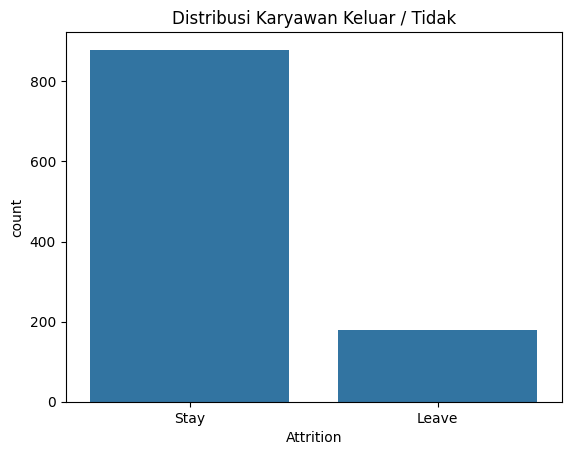

Attrition
0.0    0.830813
1.0    0.169187
Name: proportion, dtype: float64


In [56]:
# Distribusi kelas
sns.countplot(x='Attrition', data=df)
plt.title("Distribusi Karyawan Keluar / Tidak")
plt.xticks([0, 1], ['Stay', 'Leave'])
plt.show()

# Proporsi
attrition_rate = df['Attrition'].value_counts(normalize=True)
print(attrition_rate)


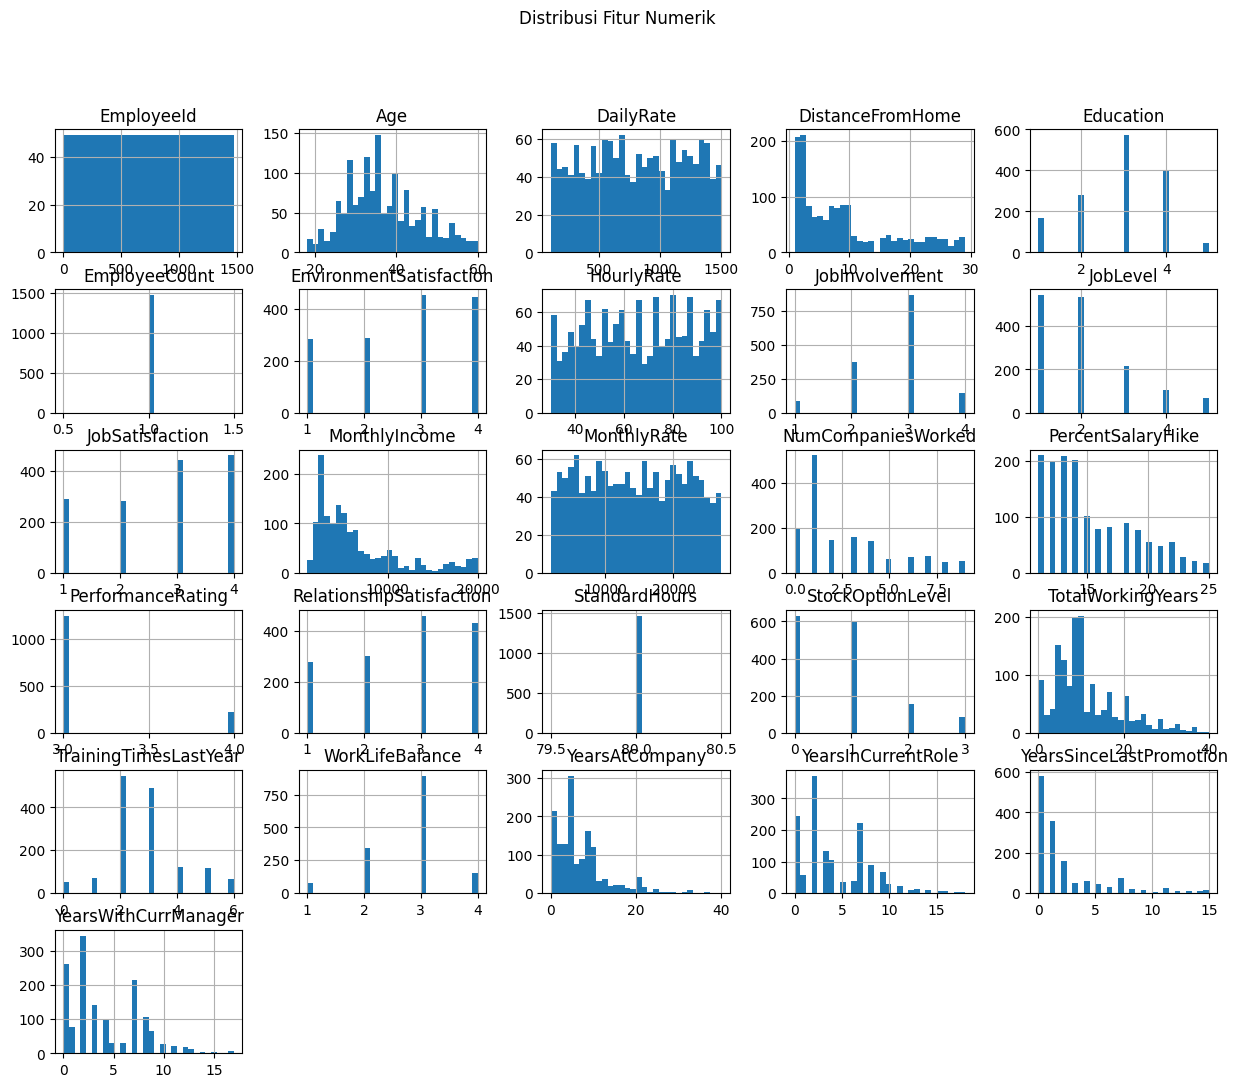

In [57]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Attrition')

df[numerical_cols].hist(figsize=(15, 12), bins=30)
plt.suptitle("Distribusi Fitur Numerik")
plt.show()


In [58]:
# # Korelasi antar numerik
# plt.figure(figsize=(16,12))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Matriks Korelasi")
# plt.show()


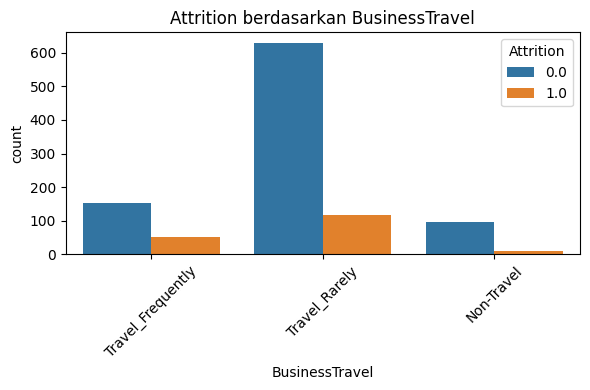

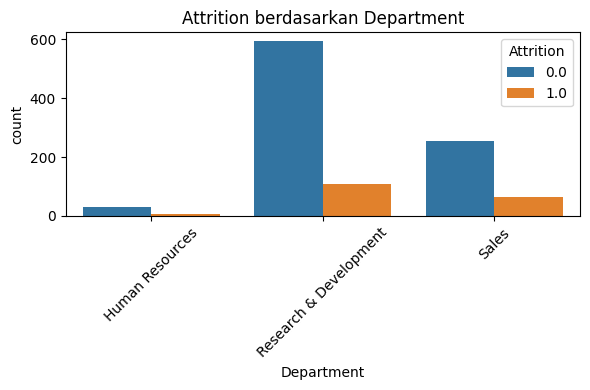

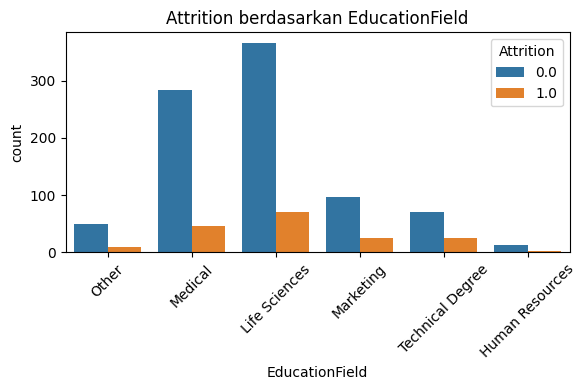

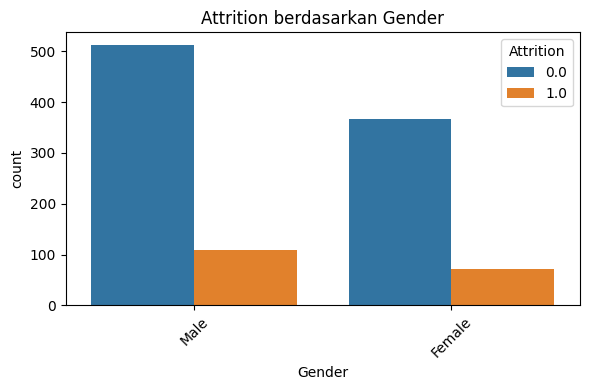

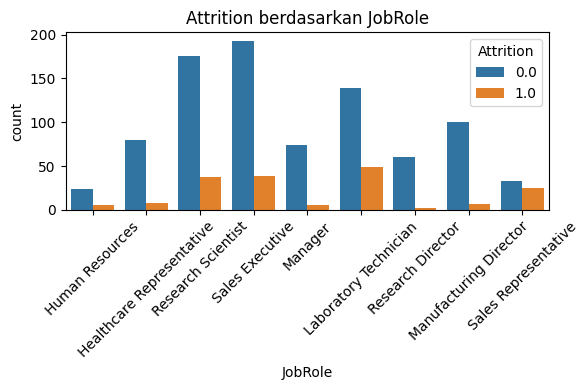

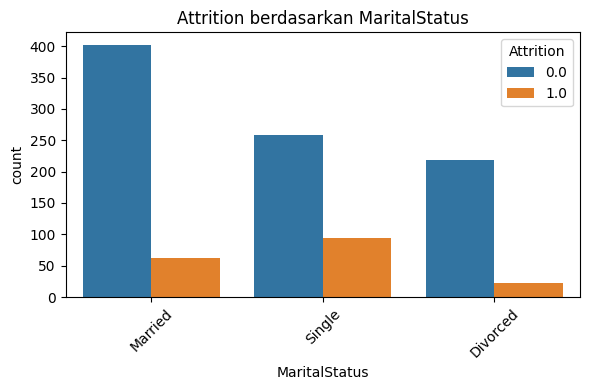

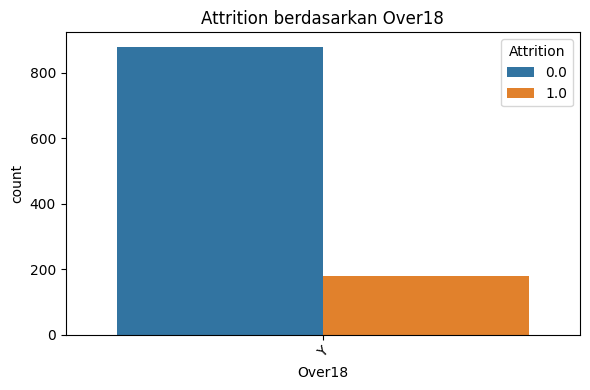

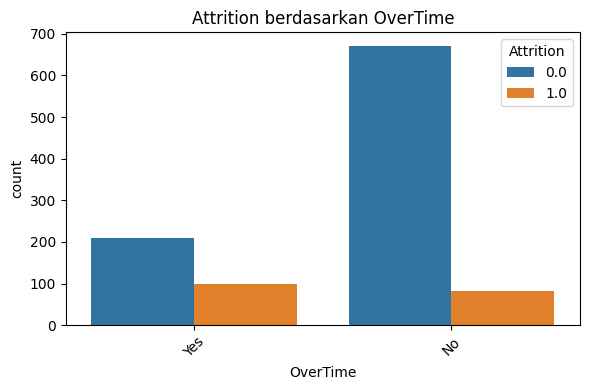

In [59]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Attrition', data=df)
    plt.title(f'Attrition berdasarkan {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [60]:
# # Korelasi fitur numerik dengan target
# cor_target = df.corr()['Attrition'].sort_values(ascending=False)
# print(cor_target)


## Data Preparation / Preprocessing

In [61]:
# Drop kolom yang tidak berguna untuk prediksi
df.drop(columns=['EmployeeId', 'Over18', 'StandardHours'], inplace=True)

In [62]:
# Hapus baris yang mengandung nilai null
df = df.dropna()

In [63]:
# Encode kolom kategorikal
categorical_cols = df.select_dtypes(include='object').columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # simpan encoder untuk deployment

In [64]:
# Pisahkan fitur dan target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [65]:
# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [66]:

# Standardisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling

In [67]:
# Coba 2 model: Logistic Regression dan Random Forest
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train kedua model
logreg.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)  # RandomForest tidak butuh scaling


RandomForestClassifier(random_state=42)

## Evaluation

In [68]:
# Logistic Regression
y_pred_logreg = logreg.predict(X_test_scaled)
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("ROC AUC Score:", roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:,1]))

=== Logistic Regression ===
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92       176
         1.0       0.62      0.44      0.52        36

    accuracy                           0.86       212
   macro avg       0.75      0.69      0.72       212
weighted avg       0.85      0.86      0.85       212

Confusion Matrix:
 [[166  10]
 [ 20  16]]
ROC AUC Score: 0.8077651515151515


c:\Users\Nibroos\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


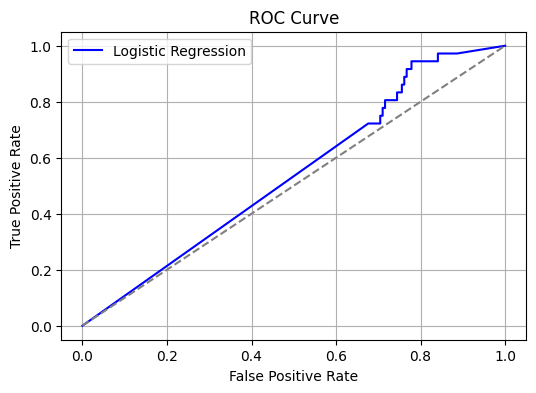

In [69]:
# ROC Curve for Logistic Regression
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="Logistic Regression", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [70]:
# Random Forest
y_pred_rf = rf.predict(X_test)
print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))



=== Random Forest ===
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92       176
         1.0       0.75      0.17      0.27        36

    accuracy                           0.85       212
   macro avg       0.80      0.58      0.59       212
weighted avg       0.84      0.85      0.81       212

Confusion Matrix:
 [[174   2]
 [ 30   6]]
ROC AUC Score: 0.8205492424242423


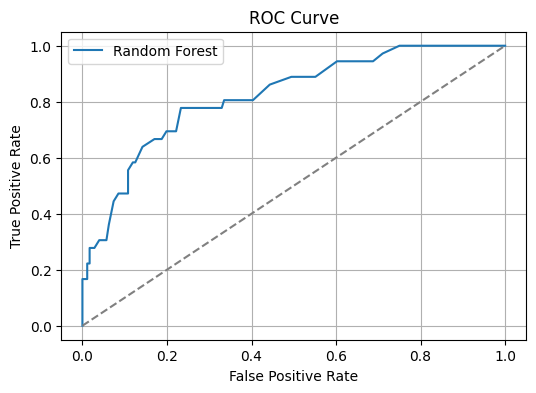

In [71]:
# ROC Curve for Random Forest
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

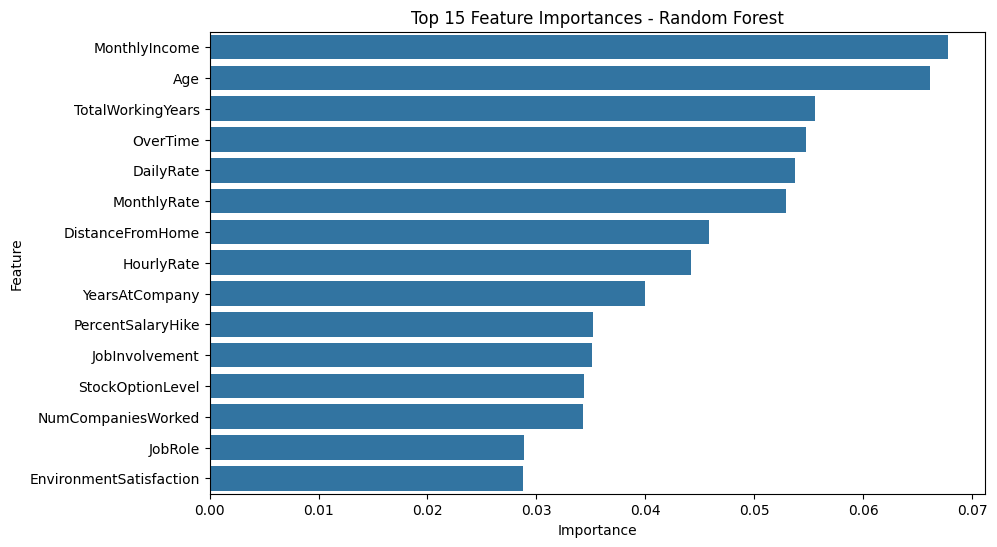

In [72]:

# Fitur penting
importances = rf.feature_importances_
feat_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance_df.head(15), x='Importance', y='Feature')
plt.title("Top 15 Feature Importances - Random Forest")
plt.show()

## Save Model

In [73]:
# Simpan model dan scaler
joblib.dump(rf, 'model_rf.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

print("Model saved successfully.")


Model saved successfully.
